# 94-867 Decision Analytics for Business and Policy 
## Team 12: Abigail Zhang, Enze Zhao, Jingchen Fu, Mandi Liu
## Final Project: Maximizing Bank Profit Success: An Optimized Marketing Strategy
## Sensitivity Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load our raw dataset
file_path = 'data/bank_marketing_dataset.csv'
bank_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


# Sensitive Analysis 

In [14]:
# Data Preprocessing
# Checking for missing values
missing_values = bank_data.isnull().sum()

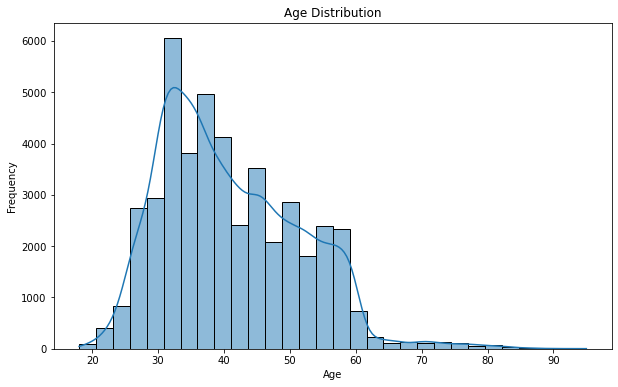

In [2]:

# EDA: Visualizing distributions of Age 
plt.figure(figsize=(10, 6))
sns.histplot(bank_data['age'], bins=30, kde=True)
plt.title('Age Distribution') #display title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

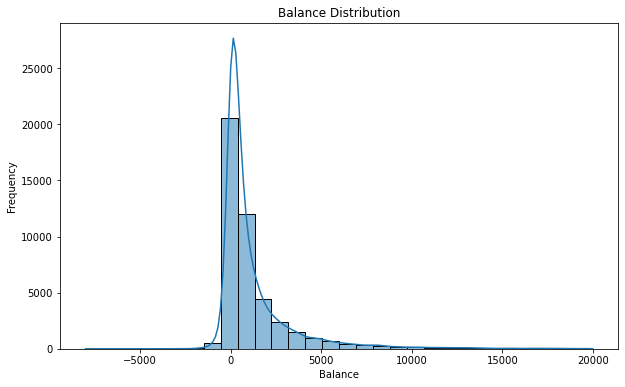

In [3]:
# Balance distribution
plt.figure(figsize=(10, 6))
sns.histplot(bank_data[bank_data['balance'] < 20000]['balance'], bins=30, kde=True)  # Limiting to balance < 20000 for better visualization
plt.title('Balance Distribution') #display title
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

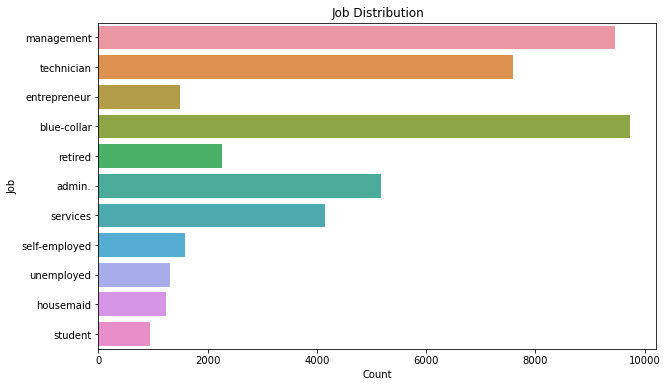

In [4]:
# Job distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=bank_data)
plt.title('Job Distribution') #display title
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

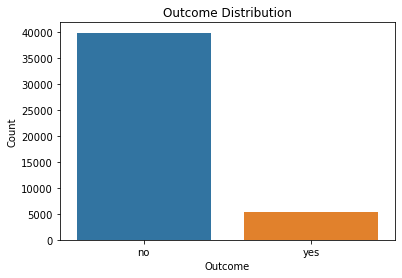

In [5]:
# Outcome distribution (y)
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank_data)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


In [6]:
# Return missing values info for further processing
missing_values

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

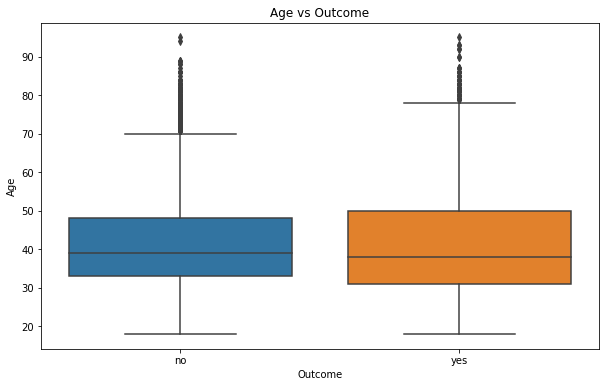

In [7]:
# Handling missing values
# Dropping columns with a high percentage of missing values which are contact and poutcome
bank_data_cleaned = bank_data.drop(columns=['contact', 'poutcome'])

# Filling missing values in 'job' and 'education' with the mode (most frequent value)
for column in ['job', 'education']:
    bank_data_cleaned[column].fillna(bank_data_cleaned[column].mode()[0], inplace=True)
#saved the non missing cleaned values to a csv 
bank_data_cleaned.to_csv('data/df_cleaned.csv', index=False)

# Verifying if missing values are handled
missing_values_cleaned = bank_data_cleaned.isnull().sum()

# Feature Sensitivity Analysis: Focus on 'age', 'balance', and 'education'
# For simplicity, we'll convert 'education' to numerical values for analysis
education_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3}
bank_data_cleaned['education_numeric'] = bank_data_cleaned['education'].map(education_mapping)

# Relationship between age and outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=bank_data_cleaned)
plt.title('Age vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

The group labeled "no" has a median age that is somewhere in the 40s, indicated by the line within the blue box.
The group labeled "yes" has a median age that is slightly higher, indicated by the line within the orange box.On average, individuals in the "yes" group tend to be older than those in the "no" group.

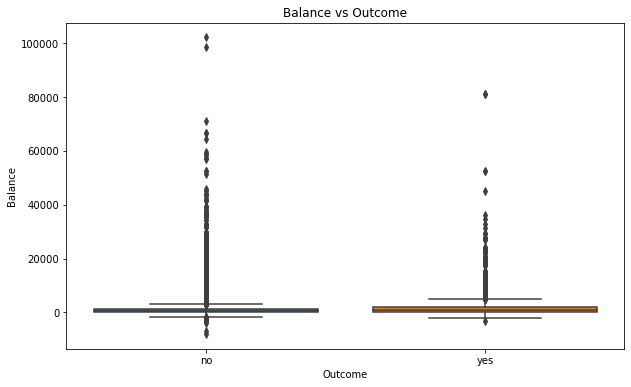

In [8]:
# Relationship between balance and outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=bank_data_cleaned)
plt.title('Balance vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Balance')
plt.show()

Both groups have a similar median Balance, but the range and the outliers suggest differences in the distribution of the Balance variable. The "no" group seems to have a wider variation and higher extreme values than the "yes" group.

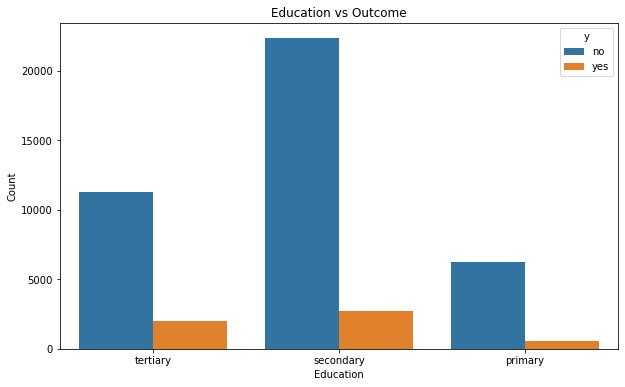

In [9]:
# Relationship between education and outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=bank_data_cleaned)
plt.title('Education vs Outcome')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


from the above bar chart we can see individuals with secondary education make up the bulk of the data for both outcomes. The distribution of outcomes does not appear to drastically change with education level in terms of proportion, but the overall number of responses is higher in the secondary education level.

In [10]:
missing_values_cleaned

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.25      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.57      0.50      0.47     13564
weighted avg       0.81      0.88      0.83     13564



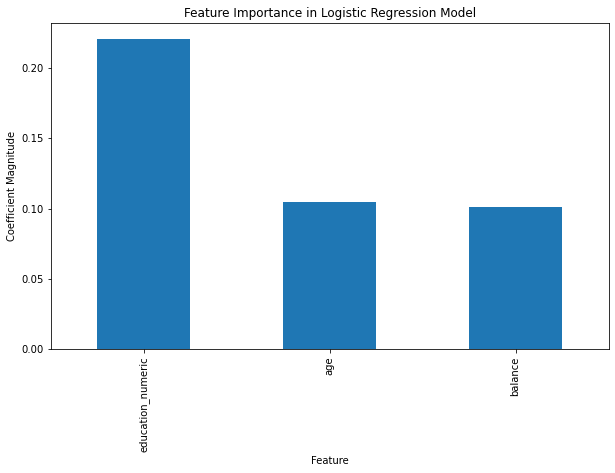

In [11]:
# Preparing data for model training
# Selecting Key Features 
features = ['age', 'balance', 'education_numeric']
X = bank_data_cleaned[features]
y = bank_data_cleaned['y']

# converts categorical labels into a numeric format that can be used in the model
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluating the model
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)

# Feature importance is determined from the coefficients of the logistic regression model
feature_importance = pd.Series(model.coef_[0], index=features).sort_values(key=abs, ascending=False)

# Displaying the classification report and feature importance
print("Classification Report:\n", report)
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.show()

for the classification report, it includes metrics such as precision, recall, f1-score, and support for two classes labeled as '0' and '1', which 0 represent non subscriber and 1 represent subscriber. For examplee 0.88  means that when the model predicts class 0 - non subscriber, it is correct 88% of the time.

For the feature importance bar graph, 'eduration_numeric' feature has the highest coefficient magnitude, suggesting it has the most significant impact on the model's predictions. 'Age' and 'balance' have lower magnitudes, indicating they have less influence on the model's predictions than 'eduration_numeric' but are still among the top factors.

/Users/enzezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/enzezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


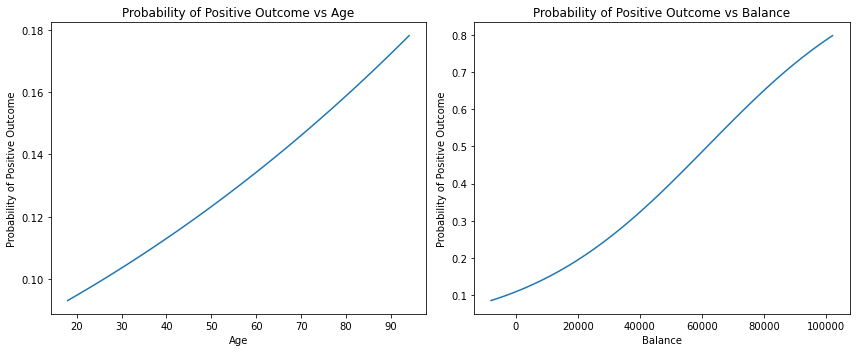

In [12]:
# Function to predict probabilities based on varying a single feature
def predict_probability_variation(feature_name, feature_range, other_features):
    # Prepare data with varying feature
    varying_data = np.array([other_features.copy() for _ in feature_range])
    varying_data[:, features.index(feature_name)] = feature_range

    # Standardize the varying data
    varying_data_scaled = scaler.transform(varying_data)

    # Predict probabilities
    probabilities = model.predict_proba(varying_data_scaled)[:, 1]  # Probability of class 1 ('yes')
    return probabilities

# Average values for other features
avg_features = X_train.mean()

# Vary 'age' and 'balance' within reasonable ranges and predict probabilities
age_range = np.arange(X['age'].min(), X['age'].max())
balance_range = np.linspace(X['balance'].min(), X['balance'].max(), 100)

# Predicting probabilities
probabilities_age = predict_probability_variation('age', age_range, avg_features)
probabilities_balance = predict_probability_variation('balance', balance_range, avg_features)

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(age_range, probabilities_age)
plt.title('Probability of Positive Outcome vs Age')
plt.xlabel('Age')
plt.ylabel('Probability of Positive Outcome')

plt.subplot(1, 2, 2)
plt.plot(balance_range, probabilities_balance)
plt.title('Probability of Positive Outcome vs Balance')
plt.xlabel('Balance')
plt.ylabel('Probability of Positive Outcome')

plt.tight_layout()
plt.show()

Two subplots are created. The first one plots age_range against probabilities_age to show how the probability of a positive outcome varies with age. The second one plots balance_range against probabilities_balance to show the variation of the probability with the balance.

/Users/enzezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score: 0.890773545487768


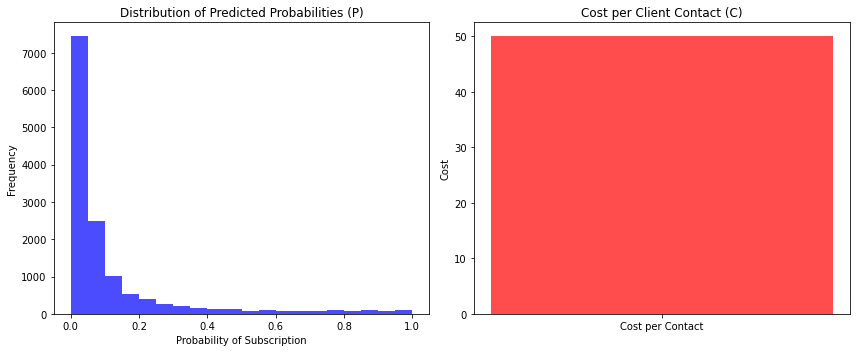

In [15]:
# Assuming bank_data is the variable name for the loaded dataset
# Since the dataset is already loaded, we use it directly

# Preprocessing: Convert categorical variables to dummy variables
# Assuming 'y' is the target variable (response to the campaign)
df_processed = pd.get_dummies(bank_data, drop_first=True)

X = df_processed.drop('y_yes', axis=1)  # Assuming 'y_yes' is the binary target after dummy encoding
y = df_processed['y_yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities on the test set
probabilities = model.predict_proba(X_test)[:, 1]

# Evaluate the model
auc_score = roc_auc_score(y_test, probabilities)
print(f'ROC AUC Score: {auc_score}')

# Cost per client contact (C)
cost_per_contact = 50  # Example cost, adjust as needed

# Generate histograms for probabilities and costs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(probabilities, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Predicted Probabilities (P)')
plt.xlabel('Probability of Subscription')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(['Cost per Contact'], [cost_per_contact], color='red', alpha=0.7)
plt.title('Cost per Client Contact (C)')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()


The AUC score represents the measure of separability, and a score close to 1 indicates a very good model that can distinguish between positive and negative classes well.The score listed above is approximately 0.89, which suggests that the model has a high level of predictive accuracy.These two graphs estimates the probability of clients subscribing to term deposit, along with the cost associated with contacting clients.